In [22]:
import pandas as pd
import numpy as np


credit_card_data = pd.read_csv('/Volumes/LACIE_SHARE/python_scripts/Data/credit_card.csv')



In [23]:
credit_card_data = pd.read_csv('/Volumes/LACIE_SHARE/python_scripts/Data/credit_card.csv')



In [32]:
print(np.max(credit_card_data['default payment next month']))
print(np.sum(credit_card_data['default payment next month']))



print(credit_card_data.keys())

### sex, education, and marriage are numeric. Are they binary?
print(np.max(credit_card_data['MARRIAGE']))
print(np.max(credit_card_data['EDUCATION']))

#print(np.max(credit_card_data['EDUCATION']))

## one hot encoding for marriage and education



features = credit_card_data.drop('default payment next month', axis = 1)
target = credit_card_data['default payment next month']


1
6636
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
3


In [48]:
## one hot encoding for marriage and education

from sklearn import preprocessing 

enc = preprocessing.OneHotEncoder()

encoded = enc.fit(credit_card_data[['EDUCATION', 'MARRIAGE']])

encoded_vars = encoded.transform(credit_card_data[['EDUCATION', 'MARRIAGE']]).toarray()

keys = ["EDUCATION0", "EDUCATION1", "EDUCATION2", "EDUCATION3", "EDUCATION4", "EDUCATION5", "EDUCATION6",\
       "MARRIAGE0", "MARRIAGE1", "MARRIAGE2", "MARRIAGE3",]

encoded_df = pd.DataFrame(encoded_vars, columns = keys)




In [59]:
## combine into one dataframe
## remove the marriage and education raw vars



combined = credit_card_data.join(encoded_df)

combined.shape

combined.head()


final = combined.drop(['EDUCATION', 'MARRIAGE'], axis = 1)



features = final.drop('default payment next month', axis = 1)
target = final['default payment next month']

In [60]:
## Import the sklearn modules

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 

X_train_org, X_test_org, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.4)
## Our dataset has 30000 observations, so we can get away with a larger test set.

## We'll do scaling after the train/test split to avoid data leakage

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.fit_transform(X_test_org)



In [63]:
## K nearest neighbors 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(18)
knn.fit(X_train, y_train)

## knn is ready for ensemble model


KNeighborsClassifier(n_neighbors=18)

In [61]:
## K nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

num_knn = 30

train_score_array = []
test_score_array = []

for k in range (1, num_knn):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
    print("k = {}, Training Accuracy: {}, Testing Accuracy: {}".\
          format(k, np.round(knn.score(X_train, y_train), decimals = 4),\
                 np.round(knn.score(X_test, y_test), decimals = 4)))

k = 1, Training Accuracy: 1.0, Testing Accuracy: 0.7278
k = 2, Training Accuracy: 0.8583, Testing Accuracy: 0.7847
k = 3, Training Accuracy: 0.8609, Testing Accuracy: 0.7752
k = 4, Training Accuracy: 0.8344, Testing Accuracy: 0.7948
k = 5, Training Accuracy: 0.8357, Testing Accuracy: 0.7933
k = 6, Training Accuracy: 0.825, Testing Accuracy: 0.801
k = 7, Training Accuracy: 0.8254, Testing Accuracy: 0.8027
k = 8, Training Accuracy: 0.8193, Testing Accuracy: 0.8039
k = 9, Training Accuracy: 0.8194, Testing Accuracy: 0.804
k = 10, Training Accuracy: 0.8153, Testing Accuracy: 0.8068
k = 11, Training Accuracy: 0.818, Testing Accuracy: 0.8061
k = 12, Training Accuracy: 0.8148, Testing Accuracy: 0.8054
k = 13, Training Accuracy: 0.8159, Testing Accuracy: 0.8064
k = 14, Training Accuracy: 0.8127, Testing Accuracy: 0.8073
k = 15, Training Accuracy: 0.8137, Testing Accuracy: 0.807
k = 16, Training Accuracy: 0.8115, Testing Accuracy: 0.8071
k = 17, Training Accuracy: 0.8119, Testing Accuracy: 0.80

KeyboardInterrupt: 

In [62]:
## The optimal k value happens when our train and test value have their minimum distance. 

difference_array = []

for i in range(0, num_knn-1):
    difference_array.append(np.abs(train_score_array[i] - test_score_array[i]))

print('our minimum distance occurred at k = {}'.\
      format(difference_array.index(np.amin(difference_array)) + 1)) 
#adding one because our knn testing started at 1, so the first value will be 
    
print('our min distance was {}'.format(np.amin(difference_array)))




IndexError: list index out of range

In [56]:
## Grid search algorithm using https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
## This search adjusts weights and method as well as k
## (Dr Snell's program did not adjust anything but k so his grid search was redundant, I think)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

k_vals = range(21, 40, 2) ## go by odd numbers because even k numbers can have ties. 

param_grid = {'n_neighbors': k_vals,
             'weights': ['uniform', 'distance'], ## Can comment out weights and metric if it takes too long
             'metric': ['euclidean', 'manhattan']
             }

grid_search = GridSearchCV(KNeighborsClassifier(), 
                           param_grid, 
                           verbose = 1,
                           cv = 15, 
                           n_jobs = -1, ## use all my cores
                           return_train_score = True)

grid_search.fit(X_train, y_train) ## Our first model is made



Fitting 15 folds for each of 40 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 48.4min finished


GridSearchCV(cv=15, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(21, 40, 2),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, verbose=1)

In [61]:
#Best score and parameters
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

## Accuracy
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 35, weights = 'distance')
knn.fit(X_train, y_train)
print("Training Accuracy:",knn.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", knn.score(X_test, y_test) )#Accuracy of the test.


Best score: 0.8072
Best parameters: {'metric': 'euclidean', 'n_neighbors': 35, 'weights': 'distance'}
Training Accuracy: 1.0
Testing Accuracy: 0.81


In [66]:
## Support Vector Classifier

from sklearn.svm import SVC

from sklearn.svm import SVC  

linear_svclassifier = SVC(kernel='linear')  
linear_svclassifier.fit(X_train, y_train) 

poly_svclassifier = SVC(kernel='poly')  
poly_svclassifier.fit(X_train, y_train) 

rbf_svclassifier = SVC(kernel='rbf')  
rbf_svclassifier.fit(X_train, y_train) 

sigmoid_svclassifier = SVC(kernel='sigmoid')  
sigmoid_svclassifier.fit(X_train, y_train) 




### We now have 4 SVCs to choose from 

## We can do a grid search for each one






SVC(kernel='sigmoid')

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc_gini = DecisionTreeClassifier(criterion = "gini", max_depth=5, min_samples_leaf=5) 
# Performing training 

dtc_gini.fit(X_train, y_train) 

dtc_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth=5, min_samples_leaf=5) 
# Performing training 

dtc_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [10]:
k_vals = range(0,10) ## go by odd numbers because even k numbers can have ties. 

param_grid = {'max_depth': k_vals,
              'min_samples_leaf' : k_vals,
             'criterion': ['gini', 'entropy'], ## Can comment out weights and metric if it takes too long
             }


grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid, 
                           verbose = 1,
                           cv = 15, 
                           n_jobs = -1, ## use all my cores
                           return_train_score = True)

grid_search_dtc.fit(X_train, y_train)

Fitting 15 folds for each of 200 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1620 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2626 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  3.9min finished


GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10)},
             return_train_score=True, verbose=1)

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'max_iter' : [1000]
             }

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)

/Volumes/LACIE_SHARE/Software/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Volumes/LACIE_SHARE/Software/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Volumes/LACIE_SHARE/Software/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Volumes/LACIE_SHARE/Software/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed.

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True)

In [64]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
## We want the results of our individual models to be poorly correlated but also better than a naive. 







In [99]:
## voting classifier

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('poly_svc_result', poly_svclassifier), ('lr', lr), ('knn', knn), ('svc_linear', linear_svclassifier), ('gnb', gnb)], voting='hard')
vc.fit(X_train, y_train)

print("Training Accuracy:",vc.score(X_train, y_train)) # Accuracy of the model when training.
print("Testing Accuracy:", vc.score(X_test, y_test) ) # Accuracy of the test.




Training Accuracy: 0.8102777777777778
Testing Accuracy: 0.8161666666666667


In [71]:
## cascading

knn_result = knn.predict(X_train)
lr_result = lr.predict(X_train)
gnb_result = gnb.predict(X_train)
linear_svc_result = linear_svclassifier.predict(X_train)
poly_svc_result = poly_svclassifier.predict(X_train)
rbf_svc_result = rbf_svclassifier.predict(X_train)
sigmoid_svc_result = sigmoid_svclassifier.predict(X_train)

results_df = pd.DataFrame({'knn': knn_result, 'lr': lr_result, 'gnb': gnb_result,\
                           'l_svc': linear_svc_result, 'p_svc':poly_svc_result, 'r_svc': poly_svc_result,\
                           's_svc': sigmoid_svc_result})


cascade_train = results_df.join(pd.DataFrame(X_train))
## get these all into a dataframe



In [72]:
cascade_lr = LogisticRegression(max_iter = 1000)
cascade_lr.fit(cascade_train, y_train)

LogisticRegression(max_iter=1000)

In [115]:
print("Training Accuracy:",cascade_lr.score(cascade_train, y_train)) # Accuracy of the model when training.
# Accuracy of the test.

Training Accuracy: 0.8131666666666667


In [73]:
knn_result = knn.predict(X_test)
lr_result = lr.predict(X_test)
gnb_result = gnb.predict(X_test)
linear_svc_result = linear_svclassifier.predict(X_test)
poly_svc_result = poly_svclassifier.predict(X_test)
rbf_svc_result = rbf_svclassifier.predict(X_test)
sigmoid_svc_result = sigmoid_svclassifier.predict(X_test)

results_df = pd.DataFrame({'knn': knn_result, 'lr': lr_result, 'gnb': gnb_result,\
                           'l_svc': linear_svc_result, 'p_svc':poly_svc_result, 'r_svc': poly_svc_result,\
                           's_svc': sigmoid_svc_result})


cascade_test = results_df.join(pd.DataFrame(X_test))

In [79]:
cascade_test.shape

(12000, 40)

In [84]:
print(X_train.shape)
print(X_test.shape)

(18000, 33)
(12000, 33)


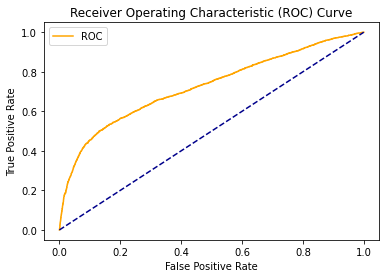

0.7249275964243722
0.3720011289867344


'\n\naccuracy = \nconf_matrix = \nrecall = \nprecision = \nsensitivity = \nspecificty = \nf_pos = \nf_neg = \nmatt_cor = '

In [96]:
""" At a minimum you should report F1 scores, ROC curve, and AUC, 
 but you might also want to consider using  accuracy scores, 
 confusion matrices, recall, precision, sensitivity, specificity, 
false positives, false negatives, Matthews correlation coefficient etc """

## ROC curve

from sklearn import metrics
import matplotlib.pyplot as plt


yprobtest_probs = cascade_lr.predict_proba(cascade_test)[:,1]

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc=0)
    plt.show()
    
    

fpr, tpr, thresholds = metrics.roc_curve(y_test, yprobtest_probs)


plot_roc_curve(fpr,tpr)


y_test_predict = cascade_lr.predict_proba(cascade_test)[:,1] 

# F1 = metrics.f1_score(y_test, y_test_predict)
#print(F1)

AUC = metrics.roc_auc_score(y_test, y_test_predict)
print(AUC)


y_test_binary = y_test_predict > .1


F1 = metrics.f1_score(y_test, y_test_binary)
print(F1)


"""

accuracy = 
conf_matrix = 
recall = 
precision = 
sensitivity = 
specificty = 
f_pos = 
f_neg = 
matt_cor = """

In [106]:
y_test_binary = y_test_predict > .4

cascade_accuracy = np.mean(y_test_binary == y_test)
print(cascade_accuracy)


0.8146666666666667


In [89]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator = bestdt, n_estimators=500)
clf.fit(X_train, y_train)

print("Training Accuracy:",clf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(clf.score(X_test,y_test))
final_algs.append("Bagging")

array([[0.79388157, 0.20611843],
       [0.71049599, 0.28950401],
       [0.77468039, 0.22531961],
       [0.86900398, 0.13099602],
       [0.82458521, 0.17541479],
       [0.82717054, 0.17282946],
       [0.74826031, 0.25173969],
       [0.88974249, 0.11025751],
       [0.82497563, 0.17502437]])

In [111]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator = dtc_entropy, n_estimators=10)
clf.fit(X_train, y_train)

print("Training Accuracy:",clf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(clf.score(X_test,y_test))
final_algs.append("Bagging")

Training Accuracy: 0.8234444444444444
Testing Accuracy: 0.8144166666666667


NameError: name 'final_performances' is not defined

In [113]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator = dtc_entropy, n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Training Accuracy:",clf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf.score(X_test, y_test) )#Accuracy of the test.
final_performances.append(clf.score(X_test,y_test))
final_algs.append("AdaBoost")


Training Accuracy: 0.8298333333333333
Testing Accuracy: 0.7591666666666667


NameError: name 'final_performances' is not defined

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Training Accuracy:",clf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.8178888888888889
Testing Accuracy: 0.8115833333333333
